In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) #sep identify the in between seperator in dataset 
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])# column 2 is not incuded only 0,1 # for converting pandas into numpy array use .values
# target = raw_df.values[1::2, 2]

In [3]:
df = pd.read_csv('C:/Users/91882/Downloads/housing_data.csv', header = None)
df = df.values
data = df[:, :-1]
target = df[:, -1]

In [4]:
data.shape, target.shape

((506, 13), (506,))

In [5]:
u = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
data = (data - u)/std

In [6]:
ones = np.ones((data.shape[0], 1))      #(row , column)
data = np.hstack((ones, data))
#After this step the number of column will become 14
#and the first x0 is 1 

In [7]:
split = 0.8

train_X = data[:int(split * data.shape[0]), :]
test_X = data[int(split * data.shape[0]):, :]
train_Y = target[:int(split * target.shape[0])]
test_Y = target[int(split * target.shape[0]):]

In [8]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(404, 14) (102, 14) (404,) (102,)


In [9]:
u

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

#important

A = (m,n)
axis = 0 , i.e. A[0] = m
so row is changing and column is constant
i.e. 1st column  2md column

In [11]:
# train_X = (train_X - u)/std

In [12]:
# u = np.mean(test_X, axis = 0)
# std = np.std(test_X, axis = 0)

In [13]:
# test_X = (test_X - u)/std

In [14]:
train_X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        ,  1.2361952 , -0.48772236, ...,  0.80657583,
         0.44105193,  1.07470353],
       [ 1.        ,  0.69616637, -0.48772236, ...,  0.80657583,
         0.21310292,  1.07330179],
       [ 1.        ,  2.46573659, -0.48772236, ...,  0.80657583,
         0.44105193,  0.99760795]])

In [15]:
# ones = np.ones((train_X.shape[0], 1))      #(row , column)
# train_X = np.hstack((ones, train_X))
# #After this step the number of column will become 14
# #and the first x0 is 1 

In [16]:
#for prediction of value
def hypothesis(X, weights):
    y_pred = 0
    for i in range(X.shape[0]):
        y_pred += weights[i] * X[i]
    return y_pred

In [17]:
def loss_func(X, weights, Y):
    loss = 0
    
    for i in range(X.shape[0]):
        
        y_pred = hypothesis(X[i], weights)
        loss += (y_pred - Y[i])**2
        
    return loss / X.shape[0]

In [18]:
#gradient=dJ/dW
def gradient(X, Y, weights):
    grad = np.zeros((X.shape[1],))
    
    for j in range(X.shape[1]):         # E
        for i in range(X.shape[0]):     # | | | |
            
            # loop i is for genrating grad for 1 weight(x1)  and weight (x1,x2...will change with j 
            y_pred = hypothesis(X[i], weights)
            grad[j] += (y_pred - Y[i]) * X[i][j]
    
    return grad/X.shape[0]    

In [19]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1],))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000  #it is the jump we have let to reach global minima
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        for j in range(X.shape[1]):
            weights[j] = weights[j] - lr_rate * grad[j]

    return weights, loss_epoch

In [20]:
weights, loss_epoch = gradient_descent(train_X, train_Y)

In [21]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

72.61916589736938


In [22]:
loss_epoch

[670.0209405940592,
 590.581587772515,
 527.8757701775032,
 477.36893650338806,
 435.85493377004696,
 401.05839892240766,
 371.35687139894435,
 345.58651710186444,
 322.9062507681232,
 302.7026516308741,
 284.5233790698483,
 268.0305036799736,
 252.9677586778422,
 239.13752461878443,
 226.3846228595929,
 214.58487473594312,
 203.63699899316703,
 193.45684987990776,
 183.97329852642105,
 175.1252699094152,
 166.85959417107432,
 159.12943338450887,
 151.89311635828415,
 145.1132640470167,
 138.75612307545745,
 132.79104932315448,
 127.19010062098795,
 121.927709589932,
 116.98041604983247,
 112.32664431974878,
 107.94651487438483,
 103.8216827392,
 99.93519706737844,
 96.27137780162344,
 92.81570636219239,
 89.5547280451149,
 86.47596434890062,
 83.56783383562599,
 80.81958041610538,
 78.2212081590314,
 75.76342188165764,
 73.43757289967027,
 71.23560940680571,
 69.15003102791283,
 67.17384714776622,
 65.30053866571596,
 63.52402286588397,
 61.83862112597924,
 60.23902921630313,
 58.7202

In [23]:
weights

array([23.03829851, -1.62971667,  0.98212177,  0.19169693,  0.51555901,
       -1.6165734 ,  3.34953527,  0.05169315, -2.74332546,  3.26287864,
       -1.94644908, -1.71584799,  0.03474858, -3.81536968])

In [24]:
import matplotlib.pyplot as plt

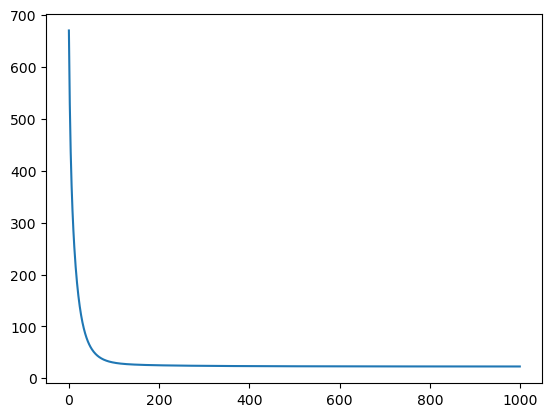

In [25]:
plt.plot(loss_epoch)
plt.show()

In [26]:
# ****************************************** Optimizing code *******************************

In [27]:
def hypothesis(x, weights):
    return np.dot(x, weights)

# h(x) = x0w0+ x2w3+ x3w3 + ..........
# i.e. x.w  where x and w are vectors

In [28]:
def loss_func(x, weights, y):
    loss = 0
    y_pred = hypothesis(x, weights)    # (m,n).(n,1) it will return (m,1)  # dot will do matrix multiplication in 2d array 
    
    loss = np.sum((y_pred - y)**2)    # ((m,1) - (m,1))**2
    
    return loss/x.shape[0]

In [29]:
def gradient(x, y, weights):
    
    y_pred = hypothesis(x, weights) 
    
    grad = np.dot(x.T, (y_pred - y)) # (n,m) . (m,1) = (n,1) grad for each column
        
    return grad/x.shape[0]

In [30]:
def gradient_descent(x, y):
    weights = np.zeros((x.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(x, y, weights)
        
        loss_epoch.append(loss_func(x, weights, y))
        
        weights = weights - lr_rate * grad
        
    return weights, loss_epoch

In [31]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

0.06940698623657227


In [32]:
weights

array([23.03829851, -1.62971667,  0.98212177,  0.19169693,  0.51555901,
       -1.6165734 ,  3.34953527,  0.05169315, -2.74332546,  3.26287864,
       -1.94644908, -1.71584799,  0.03474858, -3.81536968])

In [33]:
loss_epoch

[670.0209405940593,
 590.5815877725151,
 527.8757701775033,
 477.36893650338845,
 435.8549337700472,
 401.05839892240795,
 371.3568713989442,
 345.5865171018644,
 322.9062507681231,
 302.7026516308741,
 284.5233790698484,
 268.03050367997366,
 252.96775867784228,
 239.13752461878443,
 226.3846228595929,
 214.58487473594306,
 203.63699899316714,
 193.45684987990788,
 183.97329852642113,
 175.1252699094153,
 166.8595941710745,
 159.12943338450887,
 151.89311635828417,
 145.11326404701668,
 138.75612307545748,
 132.79104932315454,
 127.19010062098802,
 121.92770958993209,
 116.98041604983248,
 112.3266443197489,
 107.94651487438487,
 103.82168273920007,
 99.93519706737847,
 96.27137780162349,
 92.81570636219239,
 89.55472804511493,
 86.47596434890067,
 83.56783383562602,
 80.81958041610544,
 78.22120815903143,
 75.76342188165766,
 73.43757289967034,
 71.23560940680571,
 69.15003102791286,
 67.17384714776624,
 65.30053866571602,
 63.524022865883964,
 61.83862112597923,
 60.239029216303194,

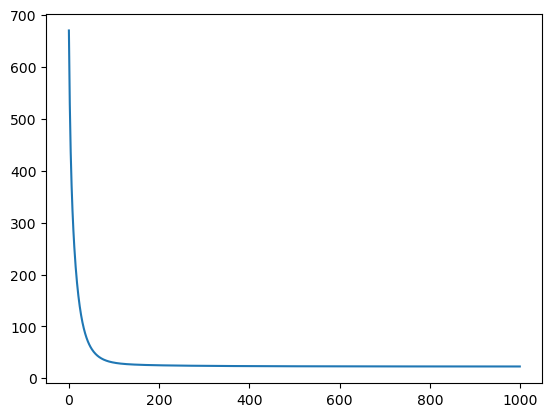

In [34]:
plt.plot(loss_epoch)
plt.show()

In [36]:
from sklearn import metrics

In [37]:
y_pred = hypothesis(test_X, weights)
print(y_pred.shape)

(102,)


In [39]:
print ('MSE', metrics.mean_squared_error(y_pred, test_Y))
print ('RMSE', metrics.mean_squared_error(y_pred, test_Y)**0.5)
print ('MAE', metrics.mean_absolute_error(y_pred, test_Y))

MSE 28.587446223325887
RMSE 5.346722942450439
MAE 4.391302584186221


In [40]:
# Easy Implementation

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(train_X, train_Y)

LinearRegression()

In [43]:
y_pred = lr.predict(test_X)

In [44]:
print ('MSE', metrics.mean_squared_error(y_pred, test_Y))
print ('RMSE', metrics.mean_squared_error(y_pred, test_Y)**0.5)
print ('MAE', metrics.mean_absolute_error(y_pred, test_Y))

MSE 32.799862680206914
RMSE 5.727116436760031
MAE 4.730017250961025
